In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
import math
%matplotlib inline

In [14]:
amostra = np.array([3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 3, 2, 1, 2, 3, 4, 1, 1, 2, 1, 1, 1, 2, 3, 0, 2, 2, 1, 2, 3, 3,
       2, 2, 3, 2])

In [15]:
amostra

array([3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 3, 2, 1, 2, 3, 4, 1, 1, 2, 1, 1, 1, 2, 3, 0, 2, 2, 1, 2, 3, 3,
       2, 2, 3, 2])

In [16]:
print('Média:',amostra.mean())
print('Desvio amostral:',amostra.std(ddof=1))

Média: 1.84
Desvio amostral: 0.817162836919


In [34]:
print('z-score',stats.norm.ppf(.95))

z-score 1.64485362695


In [23]:
# Plot área 0,025 ou zscore 1,645

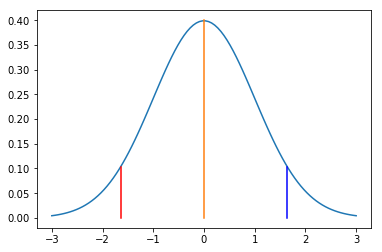

In [33]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
y = mlab.normpdf(x,mu,sigma)
zc1 = mlab.normpdf(-1.645,0,sigma)
zc2 = mlab.normpdf(1.645,0,sigma)
plt.plot([0,0],[0,0.4])
plt.plot([-1.645,-1.645],[0,zc1],'r-')
plt.plot([1.645,1.645],[0,zc2],'b-')

plt.show()

In [18]:
# Agora T de Student
nova = np.array([2, 1, 1, 3, 0, 1, 2, 1, 1, 2, 2, 0])
nova

array([2, 1, 1, 3, 0, 1, 2, 1, 1, 2, 2, 0])

In [22]:
print('Média:',nova.mean(),'Desvio amostral:',nova.std(ddof=1))

Média: 1.33333333333 Desvio amostral: 0.887625364599


In [44]:
print('t-score',stats.t.ppf(0.05/2, 11))

t-score -2.20098516008


In [50]:
print(abs(stats.t.ppf(0.05/2, df=11)))

2.20098516008


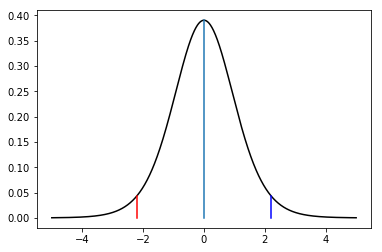

In [72]:
plt.figure()
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,11), 'k')
tc = abs(stats.t.ppf(0.05/2, df=11))
tc1 = stats.t.pdf(-tc,df=11)
tc2 = stats.t.pdf(tc,df=11)
tm = stats.t.pdf(0.0,df=11)
plt.plot([0,0],[0,tm])
plt.plot([-tc,-tc],[0,tc1],'r-')
plt.plot([tc,tc],[0,tc2],'b-')

plt.show()

In [23]:
stats.t.ppf(0.05/2, df=11)

-2.2009851600829489

In [70]:
# Qui-quadrado

In [90]:
#x = np.linspace(0, 5, 50)
#plt.plot(x, stats.chi2.pdf(x, 49))


In [24]:
# Xc esquerdo:
xesquerdo = (1 + 0.95) / 2
print('X esq',xesquerdo)

# Xc direito:
xdireito = (1 - 0.95) / 2
print('X dir',xdireito)

# Valor da probabilidade esquerda (df = graus de liberdade):
vpe = stats.chi2.isf(q=xesquerdo, df=49)
print('Val Prob Esq', vpe)

# Valor da probabilidade direita:
vpd = stats.chi2.isf(q=xdireito, df=49)
print('Val Prob Dir', vpd)

# Desvio padrão da amostra:
dp = amostra.std(ddof=1)
print('Desvio',dp)

# Limite inferior (esquerdo):
me = math.sqrt((49 * dp**2)/vpd)
print('Limite Esq',me)

# Limite superior (direito):
md = math.sqrt((49 * dp**2)/vpe)
print('Limite Dir',md)

# Testando: 
if dp <= md and dp >= me:
    print('Desvio válido')

X esq 0.975
X dir 0.025000000000000022
Val Prob Esq 31.5549164627
Val Prob Dir 70.2224135664
Desvio 0.817162836919
Limite Esq 0.6826039096396304
Limite Dir 1.0182938717196643
Desvio válido


## Amostras de queijo

In [26]:
lote = np.array([58.5, 60.1, 60.02, 57.4, 60.3, 55.4, 58.2, 59.8, 54.3, 60.4, 60.7, 60.1, 55.6, 57.1, 60.0, 
                 60.7, 60.3, 56.7,  57.9, 59.01])

In [27]:
print(len(lote))

20


In [28]:
print('Média',lote.mean(),'Desvio',lote.std(ddof=1))

Média 58.6265 Desvio 1.96817381293


In [21]:
vc = abs(stats.t.ppf(0.05, df=19))
print('valor crítico',vc)

valor crítico 1.72913281152


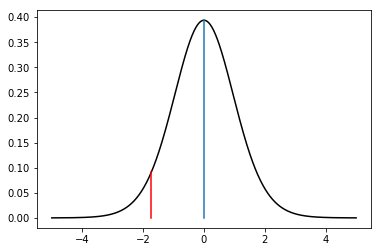

In [22]:
df = 19 # graus de liberdade
plt.figure()
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,df), 'k')
tc = abs(stats.t.ppf(0.05, df=df))
tc1 = stats.t.pdf(-tc,df=df)
tm = stats.t.pdf(0.0,df=df)
plt.plot([0,0],[0,tm])
plt.plot([-tc,-tc],[0,tc1],'r-')

plt.show()

In [32]:
t_score = (58.66 - 60) / (1.92 / math.sqrt(20))
print('t_score',t_score)
p_value = stats.t.pdf(t_score,df=19)
print('p_value',p_value)

t_score -3.1211782185934647
p_value 0.00627482624083


<function matplotlib.pyplot.show>

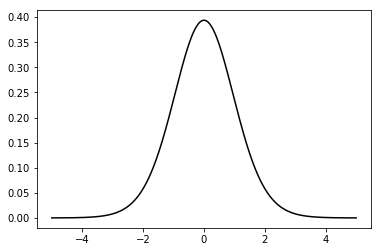

In [24]:
df = 19 # graus de liberdade
plt.figure()
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,df), 'k')
plt.show

In [6]:
# Teste bicaudal
amostra = np.array([95.88,101.2,102.04,100.1,98.7,96.18,97.53,100.79,98.52,100.08,100.45,99.19,
                    99.91,101.01,98.78,101.02,98.78,100.18,100.94,97.12])

In [7]:
mediah0 = 100 # média da Hipótese nula 100 mg
media = amostra.mean()
desvio = amostra.std(ddof=1)
n = len(amostra)
gl = n - 1
print('média',media,'desvio',desvio,'n',n,'gl',gl)

média 99.42 desvio 1.71949502991 n 20 gl 19


T crítico 1 -2.09302405441 T crítico 2 2.09302405441
tc1 0.0494481421318 tc2 0.0494481421318
t_observado -1.50848871836
a1 0.12703656733 a2 0.12703656733
Não rejeitamos a hipótese nula
alfa 0.05
valor_p 0.147878761659
Não rejeitamos a hipótese nula com base no valor_p


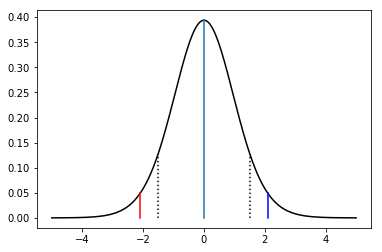

In [8]:
alfa = 0.05
plt.figure()
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,gl), 'k')
tc = abs(stats.t.ppf(0.05/2, df=gl))
print('T crítico 1',-tc,'T crítico 2',tc)
tc1 = stats.t.pdf(-tc,df=gl)
tc2 = stats.t.pdf(tc,df=gl)
print('tc1',tc1, 'tc2',tc2)
tm = stats.t.pdf(0.0,df=gl)
plt.plot([0,0],[0,tm])
plt.plot([-tc,-tc],[0,tc1],'r-')
plt.plot([tc,tc],[0,tc2],'b-')
t_observado = (media - mediah0) / (desvio / math.sqrt(n))
print('t_observado',t_observado)
a1 = stats.t.pdf(t_observado,df=gl)
a2 = a1 = stats.t.pdf(-t_observado,df=gl)
print('a1',a1,'a2',a2)
plt.plot([-t_observado,-t_observado],[0,a1],'k:')
plt.plot([t_observado,t_observado],[0,a2],'k:')
if t_observado > (-tc) and t_observado < tc:
    print('Não rejeitamos a hipótese nula')
else:
    print('Rejeitamos a hipótese nula')
print('alfa',alfa)
valor_p = stats.t.sf(np.abs(t_observado), n-1)*2
print('valor_p',valor_p)
if valor_p <= alfa:
    print('Rejeitamos a hipótese nula com base no valor_p')
else:
    print('Não rejeitamos a hipótese nula com base no valor_p')

plt.show()